<a href="https://colab.research.google.com/github/Sargam-max/Machine_Learning/blob/main/Ridge%20and%20Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import libraries
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample Data
X = np.random.rand(100, 5)
y = 3*X[:, 0] + 2*X[:, 1] + np.random.randn(100)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)   # alpha = λ
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Evaluate
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, lasso_pred)))

print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)


Ridge RMSE: 0.9620402570913313
Lasso RMSE: 0.9990528174279699
Ridge Coefficients: [ 2.32538124  1.77921321 -0.10187167  0.2974021   0.12514057]
Lasso Coefficients: [1.4990054  0.79235474 0.         0.         0.        ]


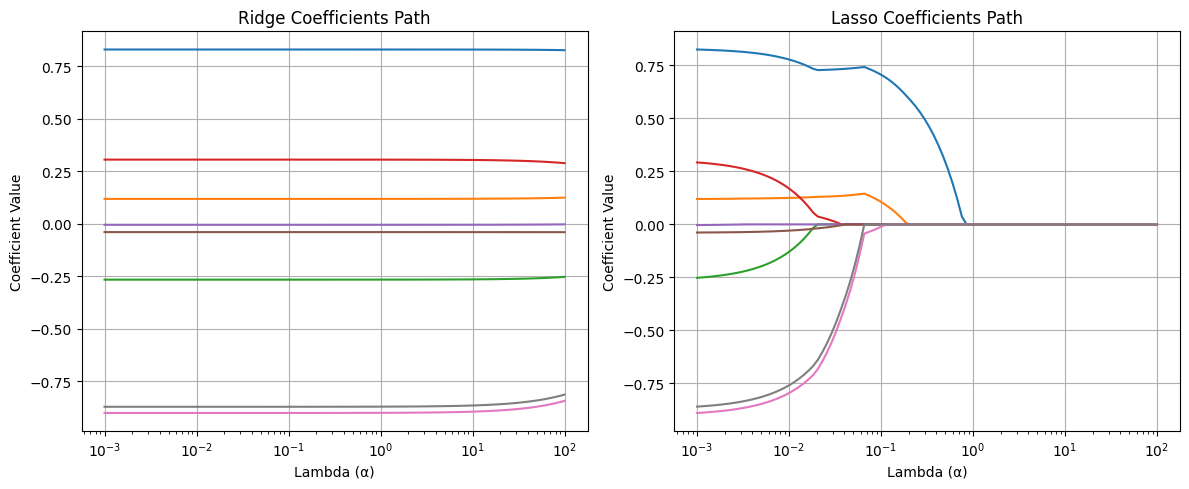

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load California housing dataset instead of Boston
data = fetch_california_housing()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Range of regularization strengths
alphas = np.logspace(-3, 2, 100)

ridge_coefs = []
lasso_coefs = []

# Compute coefficients for different alphas
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False).fit(X, y)
    lasso = Lasso(alpha=a, fit_intercept=False, max_iter=10000).fit(X, y)
    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

# Plot Ridge
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.title("Ridge Coefficients Path")
plt.xlabel("Lambda (α)")
plt.ylabel("Coefficient Value")
plt.grid(True)

# Plot Lasso
plt.subplot(1,2,2)
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.title("Lasso Coefficients Path")
plt.xlabel("Lambda (α)")
plt.ylabel("Coefficient Value")
plt.grid(True)

plt.tight_layout()
plt.show()
